# 第二章作业
这个notbook需要Interpolation_H.py和Fitting_Square.py两个文件

In [1]:
import numpy as np
import sympy as symp
import Interpolation_H as Interpolation
import Fitting_Square as FS
import matplotlib.pyplot as plt

1. 代码如下

In [2]:
Outcome = Interpolation.Lagrange_Interval(
    [0.46, 0.47, 0.48, 0.49], [0.484655, 0.4937452, 0.5027498, 0.5116683], [0.472]
)
z = symp.symbols('z')
Sol = symp.solve(Outcome[0]-0.5, z)
print(f'f(0.472)={Outcome[1]}')
for i in range(len(Sol)):
    print(f'f({Sol[i]})=0.5')

f(0.472)=[0.495552983991949]
f(-6.27684300313076 + 0.e-21*I)=0.5
f(0.476936093049039 + 0.e-22*I)=0.5
f(2.07390691052317 - 0.e-22*I)=0.5


2. 插值多项式如下

In [3]:
Outcome = Interpolation.Hermite_Interval([1, 2], [2, 3], [0, -1])
print(f'{Outcome}')

-3.0*z**3 + 13.0*z**2 - 17.0*z + 9.0


3. 三次和五次插值多项式有下列代码给出

In [4]:
Three_Interpolation = Interpolation.Piecewise_Her_Interpolation(
    [2.2, 2.4, 2.6],
    [0.5207843, 0.5104147, 0.4813306],
    [-0.0014878, -0.1004889, -0.1883635],
)
Five_Interpolation = Interpolation.Hermite_Interval(
    [2.2, 2.4, 2.6],
    [0.5207843, 0.5104147, 0.4813306],
    [-0.0014878, -0.1004889, -0.1883635],
)

print(f'三次厄米插值：{Three_Interpolation}')
print(f'五次厄米插值：{Five_Interpolation}')

三次厄米插值：Piecewise((0.0429825000000363*z**3 - 0.54408200000023*z**2 + 1.76836709999975*z - 1.19394410000018, (z <= 2.4) & (z > 2.2)), (0.0497149999999928*z**3 - 0.592549000000048*z**2 + 1.88467109999993*z - 1.28697385999997, (z <= 2.6) & (z > 2.4)))
五次厄米插值：-0.00021875000129512*z**5 + 0.0110406250169035*z**4 - 0.0470150000764988*z**3 - 0.247083874797681*z**2 + 1.32371849974152*z - 0.942254419875098


4. 我的拉格朗日插值的函数支持复数域插值

5. 见程序运行结果，注意这里的基函数参数列表中元素只能是符号表达式

In [5]:
z = symp.symbols('z')
Outcome = FS.Best_Square_Fitting([1, 2, 3, 4, 6, 7, 8], [2, 3, 6, 7, 5, 3, 2], [symp.S(1), z, z**2])
print(f'最佳二次拟合函数为{Outcome}')

最佳二次拟合函数为-0.386363636363635*z**2 + 3.43181818181817*z - 1.31818181818178


6. 见程序运行结果

In [6]:
z = symp.symbols('z')
Outcome = FS.Best_Square_Fitting([0.3, 0.5, 0.6, 0.7, 0.9], [1.37731, 1.48766, 1.53879, 1.58653, 1.67], [symp.S(1), symp.sin(z)])
print(f'最佳二次拟合函数为{Outcome}')

最佳二次拟合函数为0.600008128555637*sin(z) + 1.1999975635783


7. 见运行结果

In [7]:
print(f"{(1/6)*(2-0)*(1+4*np.exp(-1)+np.exp(-4))}")

0.8299444678581678


8. 数值积分见如下程序

In [8]:
def composite_trapezoidal(x, y):
    n = len(x) - 1
    h = (x[n] - x[0]) / n
    T = (h / 2) * (y[0] + y[n] + 2 * np.sum(y[1:n]))
    return T

x = [0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8]
y = [5.7, 4.6, 3.5, 3.7, 4.9, 5.2, 5.]
Outcome = composite_trapezoidal(x, y)
print("The numerical value of the integral is {:.6f}".format(Outcome))

The numerical value of the integral is 5.450000


9. 插值公式为
\begin{equation}
    \nonumber
    \begin{array}{l}
    \frac{{\left( {x - {x_1}} \right)\left( {x - {x_2}} \right)}}{{\left( {{x_0} - {x_1}} \right)\left( {{x_0} - {x_2}} \right)}}f\left( {{x_0}} \right) + \frac{{\left( {x - {x_0}} \right)\left( {x - {x_2}} \right)}}{{\left( {{x_1} - {x_0}} \right)\left( {{x_1} - {x_2}} \right)}}f\left( {{x_1}} \right) + \frac{{\left( {x - {x_0}} \right)\left( {x - {x_1}} \right)}}{{\left( {{x_2} - {x_0}} \right)\left( {{x_2} - {x_1}} \right)}}f\left( {{x_2}} \right)\\
    = \left( {x - \frac{1}{2}} \right)\left( {x - 2} \right)f\left( {{0}} \right) + \frac{4}{3}x\left( {x - 2} \right)f\left( {{0.5}} \right) + \frac{1}{3}x\left( {x - \frac{1}{2}} \right)f\left( {{2}} \right)
    \end{array}
\end{equation}

10. 前差、后差和中心差求得函数在2.7处的一阶导数值为

In [9]:
print(
    f"前差{(16.4446-14.8797)/0.1} \n后差{(14.8797-13.4637)/0.1} \n中心差 {(16.4446-13.4637)/0.2}"
)

前差15.649000000000015 
后差14.160000000000004 
中心差 14.90450000000001


用中心差求得的二阶导数值为

In [10]:
print(f'{((18.1741-14.8797)/0.2-(14.8797-12.1825)/0.2)/0.2}')

14.929999999999977


11. 向前差分计算$sin(x)$的数值微分程序程序

In [11]:
def f(x):
    return np.sin(x)

def forward_difference(f, x, h = 1e-6):
    return (f(x + h) - f(x)) / h

x = 1   #在这里更改x值
h = 1e-6
df = forward_difference(f, x, h)
print("The numerical value of the derivative of sin(x) at x = {} is {:.6f}".format(x, df))

The numerical value of the derivative of sin(x) at x = 1 is 0.540302


12. 以下是一个用二分法求解方程近似根的程序

In [12]:
# * 用二分法求解f(x)=0在区间[a, b]上的近似根，可选参数tol是误差范围，默认10^-6，可选参数step是最大迭代次数，默认为1000
def bisection(f, a, b, tol=1e-6, step=1000):
    # 使用二分法求解方程 f(x)=0 的近似根
    x = symp.symbols("x")
    f = symp.lambdify(x, f)
    for i in range(step):
        c = (a + b) / 2
        if abs(f(c)) < tol:
            return c
        elif f(a) * f(c) < 0:
            b = c
        else:
            a = c
    return None

用上述程序得到本题结果

In [13]:
x = symp.symbols("x")
print(f"Solution of equation x^2+x-1=0 in the range [0, 1] is {bisection(x**2+x-1,0,1,1e-3)}")
print(f"Solution of equation e^x+x-2=0 in the range [0, 1] is {bisection(symp.exp(x)+x-2,0,1,1e-6,1000000)}")
print(f"Solution of equation x^3-2x^2-x+2=0 in the range [0.4, 1.5] is {bisection(x**3-2*x**2-x+2,0.4,1.5)}")
print(f"Solution of equation tanx+tanhx=0 in the range [2, 3] is {bisection(symp.tan(x)+symp.tanh(x),0,1,1e-3)}")

Solution of equation x^2+x-1=0 in the range [0, 1] is 0.6181640625
Solution of equation e^x+x-2=0 in the range [0, 1] is 0.4428544044494629
Solution of equation x^3-2x^2-x+2=0 in the range [0.4, 1.5] is 1.0000004768371582
Solution of equation tanx+tanhx=0 in the range [2, 3] is None


13. 下面是一个用弦截法求根的函数

In [14]:
# *用弦截法求方程f(x)=0在区间[a, b]的根，可选参数tol是误差，默认为10^-6，可选参数step是最大迭代次数，默认为1000
def secant_method(f, a, b, tol=1e-6, step=1000):
    x = symp.symbols("x")
    f = symp.lambdify(x, f)
    x0, x1 = a, b
    for i in range(step):
        x2 = x1 - f(x1)*(x1-x0)/(f(x1)-f(x0))
        if abs(x2-x1) < tol:
            return x2
        else:
            x0, x1 = x1, x2
    raise ValueError("The method failed to converge")

用这个函数求得本题中方程的根为

In [15]:
x = symp.symbols("x")
print(f"Solution of equation x^4-x-10=0 in the range [0, 1] is {secant_method(x**4-x-10,1,2)}")
print(f"Solution of equation x-e^(-x)=0 in the range [0, 1] is {secant_method(x-symp.exp(-x),0,1)}")

Solution of equation x^4-x-10=0 in the range [0, 1] is 1.8555845286424912
Solution of equation x-e^(-x)=0 in the range [0, 1] is 0.5671432904097046


14. Logistic模型的不动点为$x = \frac{{a{x_e}}}{{1 + a{x_e}}}$，不动点随a的变化见下方程序

<function matplotlib.pyplot.show(close=None, block=None)>

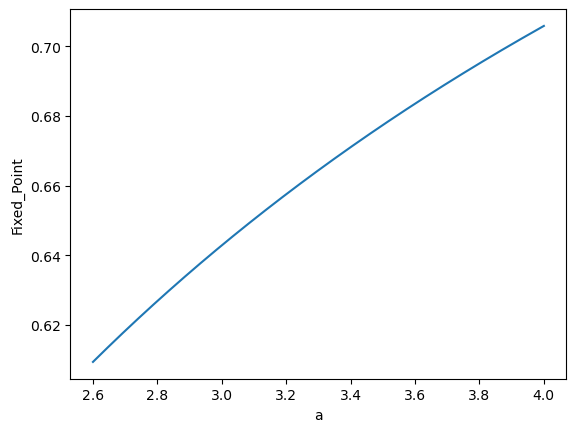

In [16]:
xe = 0.6
a = np.linspace(2.6, 4, 1000)
Fixed_Point = a*xe/(1+a*xe)

plt.xlabel('a')
plt.ylabel('Fixed_Point')
plt.plot(a, Fixed_Point)
plt.show

15. 将$e^{-x^2-y^2}$在$10 \times 10$的正方形区域内离散化后进行快速傅里叶变换和逆变换


[[ 3.54490770e+03+0.00000000e+00j -1.60587519e+03+1.79259463e-11j
   1.19432452e+03-2.66506539e-11j ... -7.29132758e+02-2.43999258e-11j
   1.19432452e+03+2.66481873e-11j -1.60587519e+03-1.78733610e-11j]
 [-1.60587519e+03+1.79447568e-11j -1.89112780e-16+3.29557021e-15j
  -3.35338769e-15+3.38224032e-15j ...  2.18547482e-14+2.38521620e-15j
  -6.92585518e-15+1.99009988e-15j  1.24039596e-15-1.45289819e-14j]
 [ 1.19432452e+03-2.66666689e-11j -9.15806507e-16-7.58809970e-16j
  -2.22270927e-15+2.00957615e-15j ... -2.20119923e-14+5.47867254e-15j
  -1.60710836e-15+2.59823954e-15j  1.55119673e-15+2.22663824e-15j]
 ...
 [-7.29132758e+02-2.44191807e-11j -1.14077169e-15-2.45629572e-16j
  -2.99213719e-15+2.09802315e-15j ...  1.62830209e-14-1.01347432e-15j
  -6.67084777e-15-1.91415588e-15j  1.11444603e-15-6.24598269e-15j]
 [ 1.19432452e+03+2.66034484e-11j  9.15806507e-16-7.58809970e-16j
  -4.38375001e-15-6.06106113e-16j ... -2.22753170e-14-5.09711521e-15j
   1.60710836e-15+2.59823954e-15j -1.55119673e-

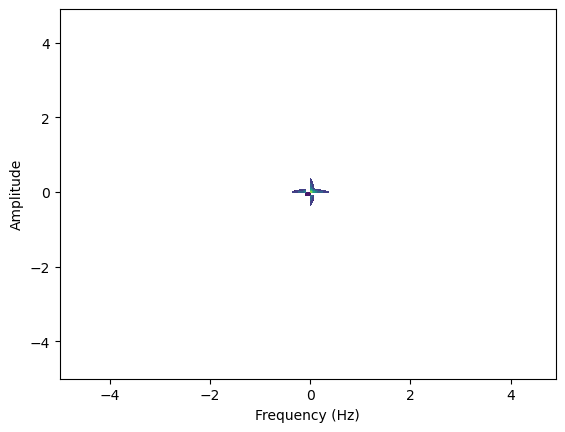

[[2.77758438e-11+3.10219551e-30j 5.12637222e-11-2.34074961e-18j
  1.12482876e-10-3.06004866e-17j ... 2.68826188e-10+8.42805370e-18j
  1.12482894e-10+1.18098198e-17j 5.12636866e-11+5.52526474e-17j]
 [5.12637932e-11-1.73091154e-17j 7.47515472e-11-2.90931396e-17j
  1.35970790e-10-4.89587493e-17j ... 2.92314013e-10+5.70426043e-18j
  1.35970843e-10-5.53104310e-18j 7.47514051e-11+2.03366568e-17j]
 [1.12483018e-10-1.83848117e-17j 1.35970897e-10-3.91368100e-17j
  1.97189962e-10-6.92930183e-17j ... 3.53533185e-10-5.21640259e-18j
  1.97190140e-10+4.44287325e-18j 1.35970772e-10+3.69379186e-17j]
 ...
 [2.68826206e-10-8.99361682e-17j 2.92314031e-10-7.56802693e-17j
  3.53533203e-10-1.31012045e-16j ... 5.09876408e-10-1.90637598e-17j
  3.53533274e-10-3.69803729e-17j 2.92313871e-10-2.29365490e-17j]
 [1.12482894e-10-2.57712795e-17j 1.35970737e-10-3.58323774e-17j
  1.97189873e-10-6.08373544e-17j ... 3.53533043e-10+4.55686652e-17j
  1.97190051e-10+2.15107881e-20j 1.35970630e-10+4.76704878e-17j]
 [5.126384

In [17]:
import numpy as np
import matplotlib.pyplot as plt

x_start, x_end, x_step = -5, 5, 0.1
y_start, y_end, y_step = -5, 5, 0.1

x, y = np.meshgrid(np.arange(x_start, x_end, x_step), np.arange(y_start, y_end, y_step))
z = np.exp(-x**2) + np.exp(-y**2)

fft = np.fft.fft2(z)
print(fft)

freq_x = np.fft.fftfreq(len(x[0]), x_step)
freq_y = np.fft.fftfreq(len(y), y_step)
plt.contourf(freq_x, freq_y, np.abs(fft))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()

#*逆快速傅里叶变换
ifft = np.fft.ifft2(fft)
print(ifft)